### Guided Practice: Logit Function and Odds

In [100]:
import pandas as pd
import numpy as np
from patsy import dmatrices, dmatrix, demo_data
from sklearn.linear_model import LogisticRegression

In [101]:
# Upload the dataset
df = pd.read_csv('../datasets/collegeadmissions.csv')

Review the data and list some questions this dataset can help answer:



In [102]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [103]:
df = df.join(pd.get_dummies(df['rank']))

In [104]:
attributes = "admit ~ C(rank) + gre + gpa"
y_patsy, X_patsy = dmatrices(attributes, df, return_type="dataframe")
print y_patsy.head()
print X_patsy.head()

   admit
0      0
1      1
2      1
3      1
4      0
   Intercept  C(rank)[T.2]  C(rank)[T.3]  C(rank)[T.4]  gre   gpa
0          1             0             1             0  380  3.61
1          1             0             1             0  660  3.67
2          1             0             0             0  800  4.00
3          1             0             0             1  640  3.19
4          1             0             0             1  520  2.93


In [105]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [106]:
lm_patsy = LogisticRegression()
lm_patsy.fit(X_patsy, y_patsy)

/Users/powchow/.virtualenvs/gatech-ml/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
lm = LogisticRegression()
#lm = LogisticRegression(class_weight = {0: 10, 1: 1})
lm.fit(df[['gre', 'gpa', 2, 3,4]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
# Coefficients represent the log-odds. This includes the y-intercept. 
print lm.coef_
print lm.intercept_
print df.admit.mean()

[[ 0.00181821  0.24353851 -0.60583828 -1.17492438 -1.37839853]]
[-1.87278819]
0.3175


In [109]:
# Coefficients represent the log-odds. This includes the y-intercept. 
print lm_patsy.coef_
print lm_patsy.intercept_
print y_patsy.admit.mean()

[[-1.0695105  -0.65439995 -1.19919015 -1.41696886  0.00190732  0.31410167]]
[-1.0695105]
0.3175


In [110]:
# You can easily convert these into odds using numpy.exp()
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print df.admit.mean()

[[ 1.00181987  1.27575545  0.54561685  0.30884233  0.25198177]]
[ 0.15369453]
0.3175


The above makes it more clear that a schools rank as it approaches 4 decreases the odds of getting admitted.
The accuracy of the model with all features is ~71.25% (see score below).

In [111]:
feature_set = df[['gre', 'gpa', 1, 2, 3,]]
print lm.score(feature_set, df['admit'])

0.6425


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

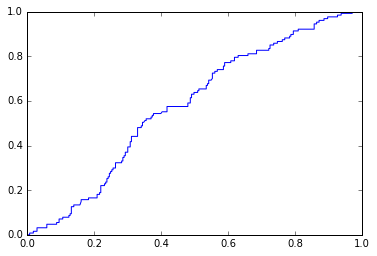

In [113]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

In [119]:
#cm = confusion_matrix(df[['gre', 'gpa', 2, 3,4]], probas)

In [116]:
print df[['admit']]
print probas[:,1]

     admit
0        0
1        1
2        1
3        1
4        0
5        1
6        1
7        0
8        1
9        0
10       0
11       0
12       1
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       0
21       1
22       0
23       0
24       1
25       1
26       1
27       1
28       1
29       0
..     ...
370      1
371      1
372      1
373      1
374      0
375      0
376      0
377      1
378      0
379      0
380      0
381      1
382      0
383      0
384      1
385      0
386      1
387      0
388      0
389      0
390      1
391      1
392      1
393      1
394      1
395      0
396      0
397      0
398      0
399      0

[400 rows x 1 columns]
[ 0.15695094  0.23914367  0.48752701  0.51693246  0.44676509  0.28185972
  0.324168    0.17216951  0.19096433  0.30570152  0.63551168  0.29019876
  0.46938066  0.26408082  0.44232694  0.17643758  0.61961436  0.12204864
  0.33628964  0.36148839  0.17220736  0.27614851  0.47624739  0.53506341
  

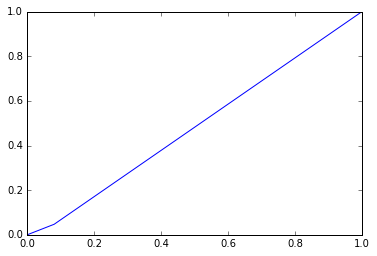

In [66]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [67]:
roc_auc_score(df['admit'], lm.predict(feature_set))

0.48332900695105413

In [77]:
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10),
    scoring='roc_auc'
)

[10**-i for i in range(-5, 5)]

[100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [69]:
titanic = pd.read_csv('../datasets/titanic.csv')

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [71]:
titanic.set_index('PassengerId', inplace=True)
titanic = titanic.join(pd.get_dummies(titanic.Pclass))
titanic['is_male'] = titanic.Sex.apply(lambda x: 1 if x == 'male' else 0)

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

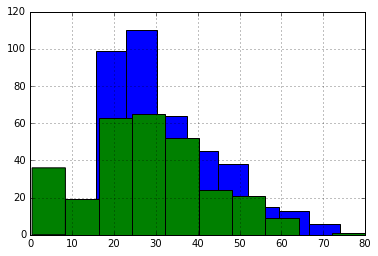

In [72]:
%matplotlib inline
titanic.groupby('Survived').Age.hist()

In [73]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,is_male
PassengerId,,,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S,0,1,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S,1,0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0,0,1,0
890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C,1,0,0,1
891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q,0,0,1,1


In [74]:
titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)

In [75]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,is_male,had_parents,had_siblings
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0,0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,1,1,0,0


In [95]:
from sklearn import grid_search, cross_validation

feature_set = titanic[['is_male', 1, 2, 'Fare', 'Age', 'had_parents', 'had_siblings']]

gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10) #scoring='roc_auc'
)


gs.fit(feature_set, titanic.Survived)
#print gs.grid_scores_


/Users/powchow/.virtualenvs/gatech-ml/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/powchow/.virtualenvs/gatech-ml/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/powchow/.virtualenvs/gatech-ml/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/powchow/.virtualenvs/gatech-ml/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The cla

GridSearchCV(cv=sklearn.cross_validation.KFold(n=891, n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'class_weight': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [97]:
#[10**-i for i in range(-5, 5)]
gs.grid_scores_

[mean: 0.79574, std: 0.02772, params: {'C': 100000, 'class_weight': None},
 mean: 0.78563, std: 0.02359, params: {'C': 100000, 'class_weight': 'auto'},
 mean: 0.79574, std: 0.02772, params: {'C': 10000, 'class_weight': None},
 mean: 0.78563, std: 0.02359, params: {'C': 10000, 'class_weight': 'auto'},
 mean: 0.79574, std: 0.02772, params: {'C': 1000, 'class_weight': None},
 mean: 0.78563, std: 0.02359, params: {'C': 1000, 'class_weight': 'auto'},
 mean: 0.79574, std: 0.02772, params: {'C': 100, 'class_weight': None},
 mean: 0.78563, std: 0.02359, params: {'C': 100, 'class_weight': 'auto'},
 mean: 0.79574, std: 0.02772, params: {'C': 10, 'class_weight': None},
 mean: 0.78339, std: 0.02445, params: {'C': 10, 'class_weight': 'auto'},
 mean: 0.79349, std: 0.03290, params: {'C': 1, 'class_weight': None},
 mean: 0.78339, std: 0.02172, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.78451, std: 0.03765, params: {'C': 0.1, 'class_weight': None},
 mean: 0.77666, std: 0.03416, params: {'C': 0.

In [99]:
print gs.best_estimator_

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
